In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
sales = pd.read_csv('./kc_house_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
sales.shape

(21613, 21)

In [6]:
sales.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Text(0, 0.5, 'price')

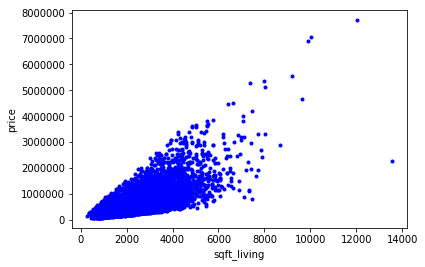

In [9]:
plt.plot(sales['sqft_living'], sales['price'], 'b.')
plt.xlabel('sqft_living')
plt.ylabel('price')

In [10]:
sales.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [17]:
train_data, test_data = train_test_split(sales, train_size=0.8, random_state=0)
print(train_data.shape)
print(test_data.shape)

(17290, 21)
(4323, 21)


C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
input_label = ['sqft_living']
output_label = ['price']

train_input = train_data[input_label].values
train_output = train_data[output_label].values
test_input = test_data[input_label].values
test_output = test_data[output_label].values

In [19]:
model = LinearRegression(normalize=True)

model.fit(train_input, train_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
print('intercept:', model.intercept_[0])
print('slope:', model.coef_[0][0])

intercept: -48536.690058289445
slope: 284.1477103801126


In [21]:
print('mse:', np.mean((model.predict(test_input) - test_output)**2))

mse: 62014619472.34492


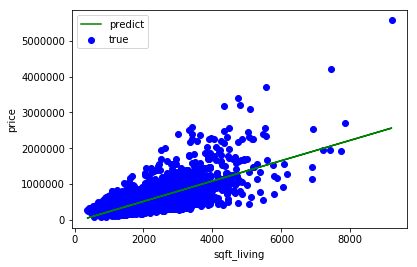

In [22]:
# Plot test data and the model prediction
plt.scatter( test_input, test_output,  color='blue', label="true" )
plt.plot( test_input, model.predict(test_input), color='green', label="predict" )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(loc='upper left')

In [24]:
sales = sales.sort_values(['sqft_living', 'price'])
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [ ]:
train_data, test_data = train_test_split(sales, train_size=0.8, random_state=0)
print(train_data.shape)
print(test_data.shape)

In [26]:
input_label = ['sqft_living']
output_label = ['price']

train_input = train_data[input_label].values
train_output = train_data[output_label].values
test_input = test_data[input_label].values
test_output = test_data[output_label].values

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [42]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression(normalize=True))])

In [43]:
model.fit(train_input, train_output)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))])

In [44]:
print(model.named_steps['linear'].coef_)

[[0.00000000e+00 7.19132788e+01 3.82603868e-02]]


In [45]:
print('mse:', np.mean((model.predict(test_input) - test_output)**2))

mse: 57797444448.11357


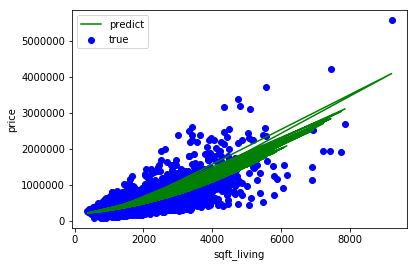

In [46]:
# Plot test data and the model prediction
plt.scatter( test_input, test_output,  color='blue', label="true" )
plt.plot( test_input, model.predict(test_input), color='green', label="predict" )
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend(loc='upper left')

In [ ]:
from sklearn.linear_model import Ridge